# Project 2: Investigate a Dataset (TMDb movie data)
Udacity Data Analyst Nanodegree <br> Jean Carlos da Cruz

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue

> **The goal here is to answer the following questions:** <br>
<ul>
<li><a href="#top10_revenue">Which movies are in the top#10 movies by revenue?</a></li>
<li><a href="#biggest_number_movies">Wich production company has the biggest number of movies reliesed?</a></li>
<li><a href="#companies_spent">Wich production company had spent the most?</a></li>
<li><a href="#higher_revenue">Wich production company had the higher revenue?</a></li>
<li><a href="#profit_movie">Is there any movie that were not profitable? Is yes, how many?</a></li>
<li><a href="#profit_trend">How the profit changed over years? Movies got more profitable over years?</a></li>
<li><a href="#runtime_trend">How the runtime changed over years?</a></li>
<li><a href="#top5_genre_reliesed">Considering the top#5 companies by revenue, how many movies they reliesed by genre?</a></li>
<li><a href="#corr_budget_revenue">How is the correlation between budget and revenue?</a></li>
<li><a href="#corr_runtime_revenue">How is the correlation between runtime and revenue?</a></li>

In [8]:
# Import all the packages needed for analysis
import numpy as np
import pandas as pd
import csv
from datetime import datetime
import matplotlib.pyplot as plt
# to Print our visualizations
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

>After loading the dataset, I checked for cleanliness, and then trim and clean the dataset to answer the goal questions.

### General Properties


In [9]:
#loading the csv file and storing it in the variable "df_movies"
df_movies = pd.read_csv('tmdb-movies.csv')

#getting first five rows of the dataset
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
#Checking the dimensions of the dataframe
df_movies.shape

(10866, 21)

In [11]:
# Checking the datatypes of the columns
df_movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [12]:
#Checking the number of unique values in each column
df_movies.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [13]:
#Checking for nulls in the dataset
df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [14]:
# check for duplicates in the data
df_movies.duplicated().sum()

1

In [15]:
#Acessing the duplicated row
df_movies[df_movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [16]:
#Checking infomation on datatypes of columns and missing values.
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [17]:
#Checking summary statistics
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning
In order to better answer the goal question, some actions need to be done in the dataset, such as:
- Removing columns that will not be used to answer any goal question (*id, imdb_id, popularity, budget, revenue, cast, homepage, director, tagline, keywords, overview, vote_count, vote_average*);
- Removing the duplicated line;
- Convert *budget_adj* and *revenue_adj* column to int;
- Replacing runtime value of 0 to NULL. Since it will affect the results.
- There are movies where the budget or revenue have a value of 0, meaning that the values of those movies has not been recorded. So, we will be creating separated datasets to answer questions related to budget, revenue and profit;



Removing columns that will not be used to answer any goal question (*id, imdb_id, popularity, budget, revenue, cast, homepage, director, tagline, keywords, overview, vote_count, vote_average*);

In [18]:
# Columns that needs to be deleted
deleted_columns = [ 'id', 'imdb_id', 'popularity', 'budget', 'revenue', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'vote_count', 'vote_average']
# Dropping the columns from the database
df_movies.drop(deleted_columns, axis=1, inplace=True)

In [19]:
#Checking the new dataset
df_movies.head()

,original_title,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,1.379999e+08,3.481613e+08
2,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,1.839999e+08,1.902723e+09
4,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,1.747999e+08,1.385749e+09


Removing the duplicated line.

In [20]:
#Dropping the duplicate row (Keeping the first one)
df_movies.drop_duplicates(keep = 'first', inplace = True)

In [21]:
#Checking again for duplicates in the data
df_movies.duplicated().sum()

0

Converting *budget_adj* and *revenue_adj* column to int.

In [22]:
#Converting budget_adj column to int
df_movies['budget_adj'] = df_movies['budget_adj'].astype(int)
#Converting revenue_adj column to int
df_movies['revenue_adj'] = df_movies['revenue_adj'].astype(int)

In [23]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   original_title        10865 non-null  object
 1   runtime               10865 non-null  int64 
 2   genres                10842 non-null  object
 3   production_companies  9835 non-null   object
 4   release_date          10865 non-null  object
 5   release_year          10865 non-null  int64 
 6   budget_adj            10865 non-null  int64 
 7   revenue_adj           10865 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 763.9+ KB


Replacing runtime value of 0 to NULL

In [24]:
#Replacing runtime value of 0 to NULL
df_movies['runtime'] = df_movies['runtime'].replace(0, np.NaN)
#Checking again the statistics of runtime
df_movies.describe()

,runtime,release_year,budget_adj,revenue_adj
count,10834.000000,10865.000000,1.086500e+04,1.086500e+04
mean,102.363855,2001.321859,1.754989e+07,5.136900e+07
std,30.948225,12.813260,3.430753e+07,1.446383e+08
min,2.000000,1960.000000,0.000000e+00,0.000000e+00
25%,90.000000,1995.000000,0.000000e+00,0.000000e+00
50%,99.000000,2006.000000,0.000000e+00,0.000000e+00
75%,112.000000,2011.000000,2.085325e+07,3.370173e+07
max,900.000000,2015.000000,4.250000e+08,2.827124e+09


Creating separated datasets to answer questions related to budget, revenue and profit;

In [25]:
#Copying the full dataset to calculate profit
df_movies_profit = df_movies

In [26]:
#Replacing 0 with NULL (budget_adj)
df_movies_profit['budget_adj'] = df_movies_profit['budget_adj'].replace(0, np.NaN)
#Replacing 0 with NULL (revenue_adj)
df_movies_profit['revenue_adj'] = df_movies_profit['revenue_adj'].replace(0, np.NaN)

In [27]:
df_movies_profit

,original_title,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,137999939.0,1.392446e+09
1,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,137999939.0,3.481613e+08
2,Insurgent,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,101199955.0,2.716190e+08
3,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,183999919.0,1.902723e+09
4,Furious 7,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,174799923.0,1.385749e+09
...,...,...,...,...,...,...,...,...
10861,The Endless Summer,95.0,Documentary,Bruce Brown Films,6/15/66,1966,NaN,NaN
10862,Grand Prix,176.0,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,1966,NaN,NaN
10863,Beregis Avtomobilya,94.0,Mystery|Comedy,Mosfilm,1/1/66,1966,NaN,NaN
10864,"What's Up, Tiger Lily?",80.0,Action|Comedy,Benedict Pictures Corp.,11/2/66,1966,NaN,NaN


In [28]:
#Dropping rows of budget_ajd which contains NAN
df_movies_profit.dropna(subset=['budget_adj', 'revenue_adj'], inplace = True)

In [29]:
#Checking the new size of df_movies_profit
df_movies_profit.shape

(3853, 8)

<a id='eda'></a>
## Exploratory Data Analysis

<a id='#top10_revenue'></a>
### Which movies are in the top#10 movies by revenue?

In [30]:
#Sorting values and getting the top#10 rows by revenue
movies_renuve_top10 = df_movies.sort_values(by=['revenue_adj'], ascending=False).head(10)
movies_renuve_top10

,original_title,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
1386,Avatar,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,2009,240886902.0,2.827124e+09
1329,Star Wars,121.0,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,1977,39575591.0,2.789712e+09
5231,Titanic,194.0,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,1997,271692064.0,2.506406e+09
10594,The Exorcist,122.0,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,12/26/73,1973,39289276.0,2.167325e+09
9806,Jaws,124.0,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,6/18/75,1975,28362748.0,1.907006e+09
3,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,183999919.0,1.902723e+09
8889,E.T. the Extra-Terrestrial,115.0,Science Fiction|Adventure|Family|Fantasy,Universal Pictures|Amblin Entertainment,4/3/82,1982,23726245.0,1.791694e+09
8094,The Net,114.0,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,7/28/95,1995,31481271.0,1.583050e+09
10110,One Hundred and One Dalmatians,79.0,Adventure|Animation|Comedy|Family,Walt Disney Productions,1/25/61,1961,29179444.0,1.574815e+09
4361,The Avengers,143.0,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,2012,208943741.0,1.443191e+09


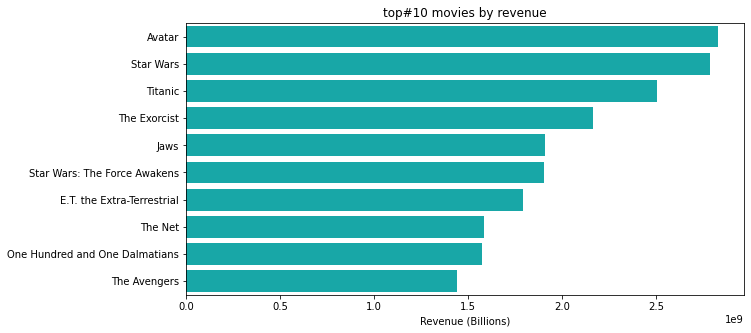

In [31]:
# Creating a bar chart to display the top#10
import seaborn as sns
f,ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='revenue_adj', y='original_title' , data=movies_renuve_top10, color='c')
ax.set(title='top#10 movies by revenue', xlabel='Revenue (Billions)', ylabel=None)
plt.show()

So the top#10 movies by revenue are:
Avatar, Star Wars, The Exorcist, Jaws, Star Wars: The Force Awakens, E.T., The Net, One Hundred and One Dalmatians and The Avengers

<a id='#biggest_number_movies'></a>
### Wich production company has the biggest number of movies reliesed?

In [96]:
#Adding all production companies in one field
cat_production_companies = df_movies['production_companies'].str.cat(sep = '|')
cat_production_companies

'Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu|Village Roadshow Pictures|Kennedy Miller Productions|Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel|Lucasfilm|Truenorth Productions|Bad Robot|Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films|Regency Enterprises|Appian Way|CatchPlay|Anonymous Content|New Regency Pictures|Paramount Pictures|Skydance Productions|Twentieth Century Fox Film Corporation|Scott Free Productions|Mid Atlantic Films|International Traders|TSG Entertainment|Universal Pictures|Illumination Entertainment|Walt Disney Pictures|Pixar Animation Studios|Walt Disney Studios Motion Pictures|Columbia Pictures|Danjaq|B24|Village Roadshow Pictures|Dune Entertainment|Anarchos Productions|Warner Bros.|DNA Films|Universal Pictures International (UPI)|Film4|Columbia Pictures|Happy Madison Productions|Marvel Studios|Prime Focus|Revolution Sun Studios|Double Feature Films|The Weinstein Company|F

In [97]:
#Splitting all production companies considering the '|' separator
splitted_production_companies = cat_production_companies.split('|')
splitted_production_companies

['Universal Studios',
 'Amblin Entertainment',
 'Legendary Pictures',
 'Fuji Television Network',
 'Dentsu',
 'Village Roadshow Pictures',
 'Kennedy Miller Productions',
 'Summit Entertainment',
 'Mandeville Films',
 'Red Wagon Entertainment',
 'NeoReel',
 'Lucasfilm',
 'Truenorth Productions',
 'Bad Robot',
 'Universal Pictures',
 'Original Film',
 'Media Rights Capital',
 'Dentsu',
 'One Race Films',
 'Regency Enterprises',
 'Appian Way',
 'CatchPlay',
 'Anonymous Content',
 'New Regency Pictures',
 'Paramount Pictures',
 'Skydance Productions',
 'Twentieth Century Fox Film Corporation',
 'Scott Free Productions',
 'Mid Atlantic Films',
 'International Traders',
 'TSG Entertainment',
 'Universal Pictures',
 'Illumination Entertainment',
 'Walt Disney Pictures',
 'Pixar Animation Studios',
 'Walt Disney Studios Motion Pictures',
 'Columbia Pictures',
 'Danjaq',
 'B24',
 'Village Roadshow Pictures',
 'Dune Entertainment',
 'Anarchos Productions',
 'Warner Bros.',
 'DNA Films',
 'Univer

In [98]:
#Counting the number of movies by any production company
production_companies_count = pd.DataFrame(pd.Series(splitted_production_companies).value_counts(ascending = False))
production_companies_count.head(1)

,0
Universal Pictures,329


The production company with the biggest number of movies reliesed is **Universal Pictures**

<a id='#companies_spent'></a>
### Wich production company had spent the most?
*Estimation based on the total budget divided by the number of companies per movie*

In [35]:
#Making a copy of the dataset
df_production_companies = df_movies

In [36]:
#Dropping NULL values for production_companies
df_production_companies.dropna(subset=['production_companies'], inplace = True)
df_production_companies

,original_title,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,137999939.0,1.392446e+09
1,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,137999939.0,3.481613e+08
2,Insurgent,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,101199955.0,2.716190e+08
3,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,183999919.0,1.902723e+09
4,Furious 7,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,174799923.0,1.385749e+09
...,...,...,...,...,...,...,...,...
10822,Who's Afraid of Virginia Woolf?,131.0,Drama,Chenault Productions,6/21/66,1966,50385110.0,2.266436e+08
10828,Torn Curtain,128.0,Mystery|Thriller,Universal Pictures,7/13/66,1966,20154044.0,8.733419e+07
10829,El Dorado,120.0,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,1966,31258922.0,4.030809e+07
10835,The Sand Pebbles,182.0,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,1966,80616176.0,1.343603e+08


In [37]:
#Calculating the number of production companies per movie
df_production_companies['number_of_companies']=df_production_companies['production_companies'].str.split('|').str.len()
df_production_companies

,original_title,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj,number_of_companies
0,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,137999939.0,1.392446e+09,5
1,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,137999939.0,3.481613e+08,2
2,Insurgent,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,101199955.0,2.716190e+08,4
3,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,183999919.0,1.902723e+09,3
4,Furious 7,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,174799923.0,1.385749e+09,5
...,...,...,...,...,...,...,...,...,...
10822,Who's Afraid of Virginia Woolf?,131.0,Drama,Chenault Productions,6/21/66,1966,50385110.0,2.266436e+08,1
10828,Torn Curtain,128.0,Mystery|Thriller,Universal Pictures,7/13/66,1966,20154044.0,8.733419e+07,1
10829,El Dorado,120.0,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,1966,31258922.0,4.030809e+07,2
10835,The Sand Pebbles,182.0,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,1966,80616176.0,1.343603e+08,3


In [38]:
#Converting number_of_companies to int
df_production_companies['number_of_companies'] = df_production_companies['number_of_companies'].astype(int)

In [39]:
#Calculating Budget per production company
df_production_companies['budget_per_company']=df_production_companies['budget_adj']/df_production_companies['number_of_companies']
df_production_companies

,original_title,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj,number_of_companies,budget_per_company
0,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,137999939.0,1.392446e+09,5,2.759999e+07
1,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,137999939.0,3.481613e+08,2,6.899997e+07
2,Insurgent,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,101199955.0,2.716190e+08,4,2.529999e+07
3,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,183999919.0,1.902723e+09,3,6.133331e+07
4,Furious 7,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,174799923.0,1.385749e+09,5,3.495998e+07
...,...,...,...,...,...,...,...,...,...,...
10822,Who's Afraid of Virginia Woolf?,131.0,Drama,Chenault Productions,6/21/66,1966,50385110.0,2.266436e+08,1,5.038511e+07
10828,Torn Curtain,128.0,Mystery|Thriller,Universal Pictures,7/13/66,1966,20154044.0,8.733419e+07,1,2.015404e+07
10829,El Dorado,120.0,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,1966,31258922.0,4.030809e+07,2,1.562946e+07
10835,The Sand Pebbles,182.0,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,1966,80616176.0,1.343603e+08,3,2.687206e+07


In [40]:
#Converting budget_per_company to int
df_production_companies['budget_per_company'] = df_production_companies['budget_per_company'].astype(int)

In [41]:
#Splitting production companies column
df_production_companies["Company"]=df_production_companies["production_companies"].str.split('|')
df_production_companies

,original_title,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj,number_of_companies,budget_per_company,Company
0,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,137999939.0,1.392446e+09,5,27599987,"[Universal Studios, Amblin Entertainment, Lege..."
1,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,137999939.0,3.481613e+08,2,68999969,"[Village Roadshow Pictures, Kennedy Miller Pro..."
2,Insurgent,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,101199955.0,2.716190e+08,4,25299988,"[Summit Entertainment, Mandeville Films, Red W..."
3,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,183999919.0,1.902723e+09,3,61333306,"[Lucasfilm, Truenorth Productions, Bad Robot]"
4,Furious 7,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,174799923.0,1.385749e+09,5,34959984,"[Universal Pictures, Original Film, Media Righ..."
...,...,...,...,...,...,...,...,...,...,...,...
10822,Who's Afraid of Virginia Woolf?,131.0,Drama,Chenault Productions,6/21/66,1966,50385110.0,2.266436e+08,1,50385110,[Chenault Productions]
10828,Torn Curtain,128.0,Mystery|Thriller,Universal Pictures,7/13/66,1966,20154044.0,8.733419e+07,1,20154044,[Universal Pictures]
10829,El Dorado,120.0,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,1966,31258922.0,4.030809e+07,2,15629461,"[Paramount Pictures, Laurel Productions]"
10835,The Sand Pebbles,182.0,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,1966,80616176.0,1.343603e+08,3,26872058,"[Twentieth Century Fox Film Corporation, Solar..."


In [42]:
#Exploding the splitted production companies column
df_production_companies = df_production_companies.explode('Company')

In [43]:
#Checking the new number of rows
df_production_companies.shape

(10579, 11)

In [44]:
#Grouping the dataset based on the new Company column
df_production_companies = df_production_companies.groupby('Company')['budget_per_company'].sum().reset_index()

In [45]:
#Inserting the results into a new dataframe
production_companies_top15 = df_production_companies.sort_values(by=['budget_per_company'], ascending=False).head(15)

In [46]:
#Formatting the budget_per_company to currency in Billions
def format(x):
        return "${:.1f}B".format(x/1000000000)

production_companies_top15['budget_per_company'] = production_companies_top15['budget_per_company'].apply(format)
production_companies_top15

,Company,budget_per_company
3141,Warner Bros.,$7.9B
2186,Paramount Pictures,$7.0B
3047,Universal Pictures,$7.0B
3133,Walt Disney Pictures,$5.4B
645,Columbia Pictures,$5.0B
3001,Twentieth Century Fox Film Corporation,$4.6B
2028,New Line Cinema,$3.0B
2956,Touchstone Pictures,$2.9B
858,DreamWorks Animation,$2.6B
646,Columbia Pictures Corporation,$2.5B


The company that had spent the most is **Warner Bros.** with an estimation of $7.9B

<a id='#higher_revenue'></a>
### Wich production company had the higher revenue?
*Estimation based on the total revenue divided by the number of companies per movie*

In [47]:
#Making a copy of the dataset
df_production_companies2 = df_movies

In [48]:
#Dropping NULL values for production_companies
df_production_companies2.dropna(subset=['production_companies'], inplace = True)
df_production_companies2

,original_title,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj,number_of_companies,budget_per_company,Company
0,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,137999939.0,1.392446e+09,5,27599987,"[Universal Studios, Amblin Entertainment, Lege..."
1,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,137999939.0,3.481613e+08,2,68999969,"[Village Roadshow Pictures, Kennedy Miller Pro..."
2,Insurgent,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,101199955.0,2.716190e+08,4,25299988,"[Summit Entertainment, Mandeville Films, Red W..."
3,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,183999919.0,1.902723e+09,3,61333306,"[Lucasfilm, Truenorth Productions, Bad Robot]"
4,Furious 7,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,174799923.0,1.385749e+09,5,34959984,"[Universal Pictures, Original Film, Media Righ..."
...,...,...,...,...,...,...,...,...,...,...,...
10822,Who's Afraid of Virginia Woolf?,131.0,Drama,Chenault Productions,6/21/66,1966,50385110.0,2.266436e+08,1,50385110,[Chenault Productions]
10828,Torn Curtain,128.0,Mystery|Thriller,Universal Pictures,7/13/66,1966,20154044.0,8.733419e+07,1,20154044,[Universal Pictures]
10829,El Dorado,120.0,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,1966,31258922.0,4.030809e+07,2,15629461,"[Paramount Pictures, Laurel Productions]"
10835,The Sand Pebbles,182.0,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,1966,80616176.0,1.343603e+08,3,26872058,"[Twentieth Century Fox Film Corporation, Solar..."


In [49]:
#Calculating the number of production companies per movie
df_production_companies2['number_of_companies']=df_production_companies2['production_companies'].str.split('|').str.len()
df_production_companies2

,original_title,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj,number_of_companies,budget_per_company,Company
0,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,137999939.0,1.392446e+09,5,27599987,"[Universal Studios, Amblin Entertainment, Lege..."
1,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,137999939.0,3.481613e+08,2,68999969,"[Village Roadshow Pictures, Kennedy Miller Pro..."
2,Insurgent,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,101199955.0,2.716190e+08,4,25299988,"[Summit Entertainment, Mandeville Films, Red W..."
3,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,183999919.0,1.902723e+09,3,61333306,"[Lucasfilm, Truenorth Productions, Bad Robot]"
4,Furious 7,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,174799923.0,1.385749e+09,5,34959984,"[Universal Pictures, Original Film, Media Righ..."
...,...,...,...,...,...,...,...,...,...,...,...
10822,Who's Afraid of Virginia Woolf?,131.0,Drama,Chenault Productions,6/21/66,1966,50385110.0,2.266436e+08,1,50385110,[Chenault Productions]
10828,Torn Curtain,128.0,Mystery|Thriller,Universal Pictures,7/13/66,1966,20154044.0,8.733419e+07,1,20154044,[Universal Pictures]
10829,El Dorado,120.0,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,1966,31258922.0,4.030809e+07,2,15629461,"[Paramount Pictures, Laurel Productions]"
10835,The Sand Pebbles,182.0,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,1966,80616176.0,1.343603e+08,3,26872058,"[Twentieth Century Fox Film Corporation, Solar..."


In [50]:
#Converting budget_per_company to int
df_production_companies2['revenue_adj'] = df_production_companies2['revenue_adj'].astype(int)

In [51]:
#Calculating Revenue per production company
df_production_companies2['revenue_per_company']=df_production_companies2['revenue_adj']/df_production_companies2['number_of_companies']
df_production_companies2

,original_title,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj,number_of_companies,budget_per_company,Company,revenue_per_company
0,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,137999939.0,1392445892,5,27599987,"[Universal Studios, Amblin Entertainment, Lege...",2.784892e+08
1,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,137999939.0,348161292,2,68999969,"[Village Roadshow Pictures, Kennedy Miller Pro...",1.740806e+08
2,Insurgent,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,101199955.0,271619025,4,25299988,"[Summit Entertainment, Mandeville Films, Red W...",6.790476e+07
3,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,183999919.0,1902723129,3,61333306,"[Lucasfilm, Truenorth Productions, Bad Robot]",6.342410e+08
4,Furious 7,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,174799923.0,1385748801,5,34959984,"[Universal Pictures, Original Film, Media Righ...",2.771498e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
10822,Who's Afraid of Virginia Woolf?,131.0,Drama,Chenault Productions,6/21/66,1966,50385110.0,226643572,1,50385110,[Chenault Productions],2.266436e+08
10828,Torn Curtain,128.0,Mystery|Thriller,Universal Pictures,7/13/66,1966,20154044.0,87334190,1,20154044,[Universal Pictures],8.733419e+07
10829,El Dorado,120.0,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,1966,31258922.0,40308088,2,15629461,"[Paramount Pictures, Laurel Productions]",2.015404e+07
10835,The Sand Pebbles,182.0,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,1966,80616176.0,134360293,3,26872058,"[Twentieth Century Fox Film Corporation, Solar...",4.478676e+07


In [52]:
#Converting revenue_per_company to int
df_production_companies2['revenue_per_company'] = df_production_companies2['revenue_per_company'].astype(int)

In [53]:
#Splitting production companies column
df_production_companies2["Company"]=df_production_companies2["production_companies"].str.split('|')
df_production_companies2

,original_title,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj,number_of_companies,budget_per_company,Company,revenue_per_company
0,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,137999939.0,1392445892,5,27599987,"[Universal Studios, Amblin Entertainment, Lege...",278489178
1,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,137999939.0,348161292,2,68999969,"[Village Roadshow Pictures, Kennedy Miller Pro...",174080646
2,Insurgent,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,101199955.0,271619025,4,25299988,"[Summit Entertainment, Mandeville Films, Red W...",67904756
3,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,183999919.0,1902723129,3,61333306,"[Lucasfilm, Truenorth Productions, Bad Robot]",634241043
4,Furious 7,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,174799923.0,1385748801,5,34959984,"[Universal Pictures, Original Film, Media Righ...",277149760
...,...,...,...,...,...,...,...,...,...,...,...,...
10822,Who's Afraid of Virginia Woolf?,131.0,Drama,Chenault Productions,6/21/66,1966,50385110.0,226643572,1,50385110,[Chenault Productions],226643572
10828,Torn Curtain,128.0,Mystery|Thriller,Universal Pictures,7/13/66,1966,20154044.0,87334190,1,20154044,[Universal Pictures],87334190
10829,El Dorado,120.0,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,1966,31258922.0,40308088,2,15629461,"[Paramount Pictures, Laurel Productions]",20154044
10835,The Sand Pebbles,182.0,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,1966,80616176.0,134360293,3,26872058,"[Twentieth Century Fox Film Corporation, Solar...",44786764


In [54]:
#Exploding the splitted production companies column
df_production_companies2 = df_production_companies2.explode('Company')

In [55]:
#Checking the new number of rows
df_production_companies2.shape

(10579, 12)

In [56]:
#Grouping the dataset based on the new Company column
df_production_companies2 = df_production_companies2.groupby('Company')['revenue_per_company'].sum().reset_index()

In [57]:
#Inserting the results into a new dataframe
production_companies2_top15 = df_production_companies2.sort_values(by=['revenue_per_company'], ascending=False).head(15)

In [58]:
#Formatting the revenue_per_company to currency in Billions
def format(x):
        return "${:.1f}B".format(x/1000000000)

production_companies2_top15['revenue_per_company'] = production_companies2_top15['revenue_per_company'].apply(format)
production_companies2_top15

,Company,revenue_per_company
2186,Paramount Pictures,$26.4B
3047,Universal Pictures,$24.9B
3141,Warner Bros.,$23.7B
3001,Twentieth Century Fox Film Corporation,$19.7B
3133,Walt Disney Pictures,$18.1B
645,Columbia Pictures,$14.7B
2028,New Line Cinema,$9.6B
858,DreamWorks Animation,$8.8B
1880,Metro-Goldwyn-Mayer (MGM),$8.3B
1737,Lucasfilm,$8.2B


The company that had the higher revenue is **Paramount Pictures	** with an estimation of $26.4B

<a id='#profit_movie'></a>
### Is there any movie that were not profitable? Is yes, how many?

In [87]:
#Converting revenue and budget to int
df_movies['budget_adj'] = df_movies['budget_adj'].astype(int)
df_movies['revenue_adj'] = df_movies['revenue_adj'].astype(int)
#Calculating profit for each movie
df_movies['Profit'] = df_movies['revenue_adj']-df_movies['budget_adj']
#Converting Profit to int
df_movies['Profit'] = df_movies['Profit'].astype(int)


In [88]:
#Creating Profitable column to dataset
df_movies.loc[df_movies['Profit'] <= 0 , 'Profitable'] = 'No'
df_movies.loc[df_movies['Profit'] > 0 , 'Profitable'] = 'Yes'
df_movies

,original_title,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj,number_of_companies,budget_per_company,Company,revenue_per_company,Profit,Profitable
0,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,137999939,1392445892,5,27599987,"[Universal Studios, Amblin Entertainment, Lege...",278489178,1254445953,Yes
1,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,137999939,348161292,2,68999969,"[Village Roadshow Pictures, Kennedy Miller Pro...",174080646,210161353,Yes
2,Insurgent,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,101199955,271619025,4,25299988,"[Summit Entertainment, Mandeville Films, Red W...",67904756,170419070,Yes
3,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,183999919,1902723129,3,61333306,"[Lucasfilm, Truenorth Productions, Bad Robot]",634241043,1718723210,Yes
4,Furious 7,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,174799923,1385748801,5,34959984,"[Universal Pictures, Original Film, Media Righ...",277149760,1210948878,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,Who's Afraid of Virginia Woolf?,131.0,Drama,Chenault Productions,6/21/66,1966,50385110,226643572,1,50385110,[Chenault Productions],226643572,176258462,Yes
10828,Torn Curtain,128.0,Mystery|Thriller,Universal Pictures,7/13/66,1966,20154044,87334190,1,20154044,[Universal Pictures],87334190,67180146,Yes
10829,El Dorado,120.0,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,1966,31258922,40308088,2,15629461,"[Paramount Pictures, Laurel Productions]",20154044,9049166,Yes
10835,The Sand Pebbles,182.0,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,1966,80616176,134360293,3,26872058,"[Twentieth Century Fox Film Corporation, Solar...",44786764,53744117,Yes


In [89]:
df_movies['Profitable'].value_counts()

Yes    2756
No     1051
Name: Profitable, dtype: int64

There were 1051 movies that made no profit.

<a id='#profit_trend'></a>
### How the profit changed over years? Movies got more profitable over years?

In [62]:
#Grouping the profit by year
profit_year = df_movies.groupby('release_year', as_index=False)['Profit'].sum()
profit_year

,release_year,Profit
0,1960,797740716
1,1961,2181770346
2,1962,1202944839
3,1963,821753299
4,1964,2071667861
5,1965,2763255503
6,1966,352485422
7,1967,4159569181
8,1968,1054889553
9,1969,1229648260


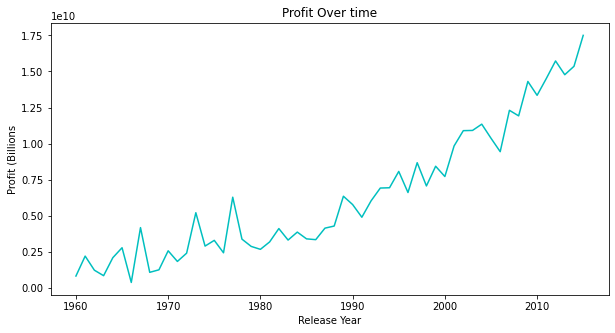

In [63]:
#Creating line chart
f,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = profit_year, x='release_year', y='Profit', color='c')
ax.set(title='Profit Over time', xlabel='Release Year', ylabel='Profit (Billions')
plt.show()

It is possible to see by the line chart above that Profit increased over years. Most of the increase came after the year 2000.

<a id='#runtime_trend'></a>
### How the runtime changed over years?

In [64]:
#Grouping the runtime by year
runtime_year = df_movies.groupby('release_year', as_index=False)['runtime'].mean()
runtime_year

,release_year,runtime
0,1960,130.000000
1,1961,132.500000
2,1962,141.285714
3,1963,153.500000
4,1964,122.428571
5,1965,167.600000
6,1966,132.200000
7,1967,118.384615
8,1968,130.777778
9,1969,127.500000


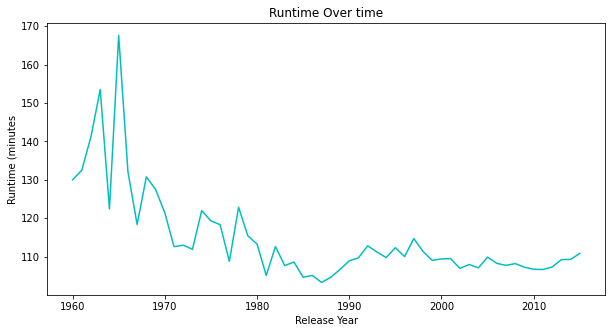

In [65]:
#Creating line chart
f,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = runtime_year, x='release_year', y='runtime', color='c')
ax.set(title='Runtime Over time', xlabel='Release Year', ylabel='Runtime (minutes')
plt.show()

It is possible to see by the line chart above that Runtime decreased over years. Indicating that movies got shorter as the years went by, probabily indicating that people after 1990 with other distractions becoming more popular (like TV and internet) don't have that much time to spend on movies.

<a id='#top5_genre_reliesed'></a>
### Considering the top#5 companies by revenue, how many movies they reliesed by genre?

In [66]:
#Getting the top#5 companies by revenue
companies_top5_revenue = production_companies2_top15.head(5)
companies_top5_revenue

,Company,revenue_per_company
2186,Paramount Pictures,$26.4B
3047,Universal Pictures,$24.9B
3141,Warner Bros.,$23.7B
3001,Twentieth Century Fox Film Corporation,$19.7B
3133,Walt Disney Pictures,$18.1B


In [67]:
#Creating a list with the companies names
top5_companies_list = companies_top5_revenue['Company'].tolist()
top5_companies_list

['Paramount Pictures',
 'Universal Pictures',
 'Warner Bros.',
 'Twentieth Century Fox Film Corporation',
 'Walt Disney Pictures']

In [68]:
#Making a copy of the dataset
df_production_companies3 = df_movies
df_production_companies3.shape

(3807, 14)

In [69]:
#Splitting production companies column
df_production_companies3["Company"]=df_production_companies3["production_companies"].str.split('|')
df_production_companies3

,original_title,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj,number_of_companies,budget_per_company,Company,revenue_per_company,Profit,Profitable
0,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,137999939,1392445892,5,27599987,"[Universal Studios, Amblin Entertainment, Lege...",278489178,1254445953,Yes
1,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,137999939,348161292,2,68999969,"[Village Roadshow Pictures, Kennedy Miller Pro...",174080646,210161353,Yes
2,Insurgent,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,101199955,271619025,4,25299988,"[Summit Entertainment, Mandeville Films, Red W...",67904756,170419070,Yes
3,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,183999919,1902723129,3,61333306,"[Lucasfilm, Truenorth Productions, Bad Robot]",634241043,1718723210,Yes
4,Furious 7,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,174799923,1385748801,5,34959984,"[Universal Pictures, Original Film, Media Righ...",277149760,1210948878,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,Who's Afraid of Virginia Woolf?,131.0,Drama,Chenault Productions,6/21/66,1966,50385110,226643572,1,50385110,[Chenault Productions],226643572,176258462,Yes
10828,Torn Curtain,128.0,Mystery|Thriller,Universal Pictures,7/13/66,1966,20154044,87334190,1,20154044,[Universal Pictures],87334190,67180146,Yes
10829,El Dorado,120.0,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,1966,31258922,40308088,2,15629461,"[Paramount Pictures, Laurel Productions]",20154044,9049166,Yes
10835,The Sand Pebbles,182.0,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,1966,80616176,134360293,3,26872058,"[Twentieth Century Fox Film Corporation, Solar...",44786764,53744117,Yes


In [70]:
#Exploding the splitted production companies column
df_production_companies3 = df_production_companies3.explode('Company')
df_production_companies3.shape

(10579, 14)

In [71]:
#querying only movies from the top#5 companies
top5_companies_revenue = df_production_companies3.query('Company == @top5_companies_list')
top5_companies_revenue

,original_title,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj,number_of_companies,budget_per_company,Company,revenue_per_company,Profit,Profitable
4,Furious 7,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,174799923,1385748801,5,34959984,Universal Pictures,277149760,1210948878,Yes
6,Terminator Genisys,125.0,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2015,142599937,405355075,2,71299968,Paramount Pictures,202677537,262755138,Yes
7,The Martian,141.0,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,2015,99359956,547749654,5,19871991,Twentieth Century Fox Film Corporation,109549930,448389698,Yes
8,Minions,91.0,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2015,68079970,1064192016,2,34039985,Universal Pictures,532096008,996112046,Yes
9,Inside Out,94.0,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,2015,160999929,785411574,3,53666643,Walt Disney Pictures,261803858,624411645,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10791,Damien: Omen II,107.0,Action|Drama|Horror|Thriller,Twentieth Century Fox Film Corporation|Mace Ne...,6/9/78,1978,22730364,88642923,2,11365182,Twentieth Century Fox Film Corporation,44321461,65912559,Yes
10828,Torn Curtain,128.0,Mystery|Thriller,Universal Pictures,7/13/66,1966,20154044,87334190,1,20154044,Universal Pictures,87334190,67180146,Yes
10829,El Dorado,120.0,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,1966,31258922,40308088,2,15629461,Paramount Pictures,20154044,9049166,Yes
10835,The Sand Pebbles,182.0,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,1966,80616176,134360293,3,26872058,Twentieth Century Fox Film Corporation,44786764,53744117,Yes


In [72]:
#Getting the total number of movies
top5_companies_revenue['Company'].count()

1241

In [73]:
#Getting the total number of movies by company
top5_companies_revenue['Company'].value_counts()

Universal Pictures                        329
Warner Bros.                              324
Paramount Pictures                        270
Twentieth Century Fox Film Corporation    201
Walt Disney Pictures                      117
Name: Company, dtype: int64

In [74]:
#checking genre to see if there is any NULL
top5_companies_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 4 to 10848
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        1241 non-null   object 
 1   runtime               1241 non-null   float64
 2   genres                1241 non-null   object 
 3   production_companies  1241 non-null   object 
 4   release_date          1241 non-null   object 
 5   release_year          1241 non-null   int64  
 6   budget_adj            1241 non-null   int64  
 7   revenue_adj           1241 non-null   int64  
 8   number_of_companies   1241 non-null   int64  
 9   budget_per_company    1241 non-null   int64  
 10  Company               1241 non-null   object 
 11  revenue_per_company   1241 non-null   int64  
 12  Profit                1241 non-null   int64  
 13  Profitable            1241 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 145.4+ KB


In [75]:
#Adding all genres in one field
cat_genres = top5_companies_revenue['genres'].str.cat(sep = '|')
cat_genres

'Action|Crime|Thriller|Science Fiction|Action|Thriller|Adventure|Drama|Adventure|Science Fiction|Family|Animation|Adventure|Comedy|Comedy|Animation|Family|Science Fiction|Fantasy|Action|Adventure|Crime|Action|Thriller|Romance|Fantasy|Family|Drama|Action|Family|Science Fiction|Adventure|Mystery|Action|Drama|Thriller|Comedy|Drama|Action|Comedy|Crime|Comedy|Action|Adventure|Comedy|Music|Adventure|Animation|Comedy|Family|Fantasy|Drama|Music|History|Drama|Comedy|Action|Adventure|Fantasy|Comedy|Animation|Science Fiction|Family|Comedy|Adventure|Drama|Mystery|Crime|Action|Thriller|Drama|Action|Adventure|Science Fiction|Action|Comedy|Crime|Action|Crime|Thriller|Thriller|Drama|Adventure|Action|History|Drama|Comedy|Adventure|Family|Fantasy|Comedy|Thriller|Comedy|Comedy|Horror|Horror|Comedy|Fantasy|Science Fiction|Thriller|Comedy|Drama|Music|Horror|Thriller|Family|Animation|Adventure|Drama|Family|Action|Crime|Comedy|Drama|Science Fiction|Thriller|Comedy|Comedy|Drama|Music|Adventure|Fantasy|Adventu

In [76]:
#Splitting all genress considering the '|' separator
splitted_genres = cat_genres.split('|')
splitted_genres

['Action',
 'Crime',
 'Thriller',
 'Science Fiction',
 'Action',
 'Thriller',
 'Adventure',
 'Drama',
 'Adventure',
 'Science Fiction',
 'Family',
 'Animation',
 'Adventure',
 'Comedy',
 'Comedy',
 'Animation',
 'Family',
 'Science Fiction',
 'Fantasy',
 'Action',
 'Adventure',
 'Crime',
 'Action',
 'Thriller',
 'Romance',
 'Fantasy',
 'Family',
 'Drama',
 'Action',
 'Family',
 'Science Fiction',
 'Adventure',
 'Mystery',
 'Action',
 'Drama',
 'Thriller',
 'Comedy',
 'Drama',
 'Action',
 'Comedy',
 'Crime',
 'Comedy',
 'Action',
 'Adventure',
 'Comedy',
 'Music',
 'Adventure',
 'Animation',
 'Comedy',
 'Family',
 'Fantasy',
 'Drama',
 'Music',
 'History',
 'Drama',
 'Comedy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Animation',
 'Science Fiction',
 'Family',
 'Comedy',
 'Adventure',
 'Drama',
 'Mystery',
 'Crime',
 'Action',
 'Thriller',
 'Drama',
 'Action',
 'Adventure',
 'Science Fiction',
 'Action',
 'Comedy',
 'Crime',
 'Action',
 'Crime',
 'Thriller',
 'Thriller',
 'Drama

In [77]:
#Counting the number of movies by genre
genre_count = pd.DataFrame(pd.Series(splitted_genres).value_counts(ascending = False).rename_axis('unique_values').reset_index(name='count'))
genre_count

,unique_values,count
0,Drama,485
1,Action,452
2,Comedy,438
3,Thriller,407
4,Adventure,341
5,Crime,227
6,Family,203
7,Science Fiction,199
8,Romance,189
9,Fantasy,173


In [78]:
genre_count['total'] = genre_count['count'].sum()
genre_count

,unique_values,count,total
0,Drama,485,3564
1,Action,452,3564
2,Comedy,438,3564
3,Thriller,407,3564
4,Adventure,341,3564
5,Crime,227,3564
6,Family,203,3564
7,Science Fiction,199,3564
8,Romance,189,3564
9,Fantasy,173,3564


In [79]:
genre_count['percentage_of_total']=(genre_count['count']/genre_count['total'])*100
genre_count

,unique_values,count,total,percentage_of_total
0,Drama,485,3564,13.608305
1,Action,452,3564,12.682379
2,Comedy,438,3564,12.289562
3,Thriller,407,3564,11.419753
4,Adventure,341,3564,9.567901
5,Crime,227,3564,6.369248
6,Family,203,3564,5.695847
7,Science Fiction,199,3564,5.583614
8,Romance,189,3564,5.303030
9,Fantasy,173,3564,4.854097


In [80]:
#rounding percentage_of_total to 2 decimal places
genre_count['percentage_of_total']=genre_count['percentage_of_total'].apply(lambda x:round(x,2))
genre_count

,unique_values,count,total,percentage_of_total
0,Drama,485,3564,13.61
1,Action,452,3564,12.68
2,Comedy,438,3564,12.29
3,Thriller,407,3564,11.42
4,Adventure,341,3564,9.57
5,Crime,227,3564,6.37
6,Family,203,3564,5.70
7,Science Fiction,199,3564,5.58
8,Romance,189,3564,5.30
9,Fantasy,173,3564,4.85


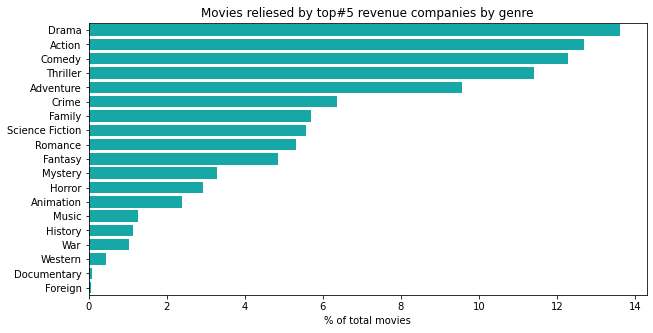

In [81]:
#Creating a line chart to better display data
f,ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='percentage_of_total', y='unique_values' , data=genre_count, color='c')
ax.set(title='Movies reliesed by top#5 revenue companies by genre', xlabel='% of total movies', ylabel=None)
plt.show()

The top#5 companies by revenue reliesed 1241 movies. We can see by the chart that they are spread across multiple genres, which *Drama, Action, Comedy and Thriller* representing 50% of them.

<a id='#corr_budget_revenue'></a>
### How is the correlation between budget and revenue?

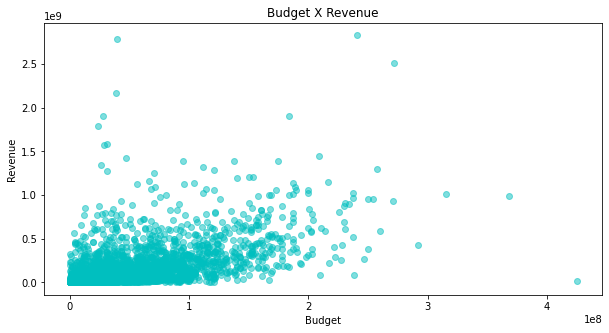

In [82]:
#Scatterplot of Budget and Revenue
x = df_movies['budget_adj']
y = df_movies['revenue_adj']

plt.subplots(figsize=(10, 5))
plt.scatter(x, y, c="c", alpha=0.5)
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title('Budget X Revenue')
plt.show()

In [83]:
#Correlation between Budget and Revenue
correlation = df_movies['budget_adj'].corr(df_movies['revenue_adj'])
correlation

0.5680963038356882

There is a positive correlation between Budget and Revenue (0.56) wich does not mean a strong correlation between those two variables. Altough, its not a strong correlation, budget can be used as a predictor to revenue.

<a id='#corr_runtime_revenue'></a>
### How is the correlation between runtime and revenue?

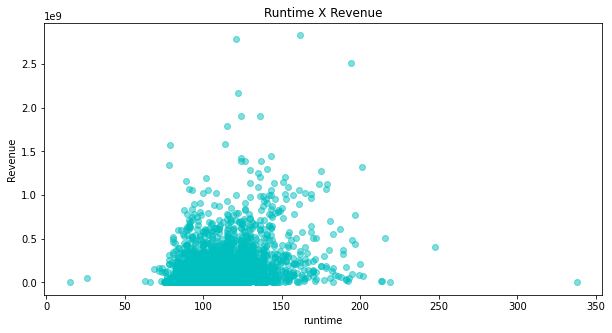

In [84]:
#Scatterplot of Runtime and Revenue
x = df_movies['runtime']
y = df_movies['revenue_adj']

plt.subplots(figsize=(10, 5))
plt.scatter(x, y, c="c", alpha=0.5)
plt.xlabel("runtime")
plt.ylabel("Revenue")
plt.title('Runtime X Revenue')
plt.show()

In [85]:
#Correlation between runtime and Revenue
correlation = df_movies['runtime'].corr(df_movies['revenue_adj'])
correlation

0.2789909778619262

There is a positive correlation between Budget and Revenue (0.28) wich means a weazk correlation between those two variables. So, runtime is not a good predictor to revenue.

<a id='conclusions'></a>
## Conclusions

- The top#10 movies by revenue are: Avatar, Star Wars, The Exorcist, Jaws, Star Wars: The Force Awakens, E.T., The Net, One Hundred and One Dalmatians and The Avengers;
- The production company with the biggest number of movies reliesed is **Universal Pictures**, altough it is not the company with the higher revenue;
- The company that had spent the most is **Warner Bros.** with an estimation of $7.9B;

- The company that had the higher revenue is **Paramount Pictures** with an estimation of $26.4B;
- Unlikely, we may think. There were 1051 movies that made no profit.
- Profit increased over years. Mostly of the increase came after the year 2000.
- Runtime decreased over years. Indicating that movies got shorter as the years went by, probabily indicating that people after 1990 with other distractions becoming more popular (like TV and internet) don't have that much time to spend on movies.
- The top#5 companies by revenue reliesed 1241 movies and they were spread across multiple genres, which *Drama, Action, Comedy and Thriller* representing 50% of them.
- There is a positive correlation between Budget and Revenue (0.56) wich does not mean a strong correlation between those two variables. Altough, its not a strong correlation, budget can be used as a predictor to revenue.
- There is a positive correlation between Budget and Revenue (0.28) wich means a weazk correlation between those two variables. So, runtime is not a good predictor to revenue.

### Limitations
- I've lost some of the data in the data cleaning steps where the dataset did not have the revenue and budget of the movies, which has affected our analysis by reducing the number of movie samples; 
- Data provided it is not up-to-date (revenue and budget are calculated to 2010);
- Budget and revenue column do not have currency unit;
- I was not able to calculate the exact impact of each production company on budget and revenue, since the data is concatenated within all companies in one row, the best fisible option was to assume that all production company had the same weight in budget and revenue.

In [86]:
#Code just to be able to export my notebook to PDF
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('sample1.ipynb')

--2021-08-04 12:49:05--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2021-08-04 12:49:06 (39.3 MB/s) - ‘colab_pdf.py’ saved [1864/1864]



KeyboardInterrupt: ignored